## Problem Set #9

MACS 30150, Dr. Evans

Ruoyun Tan

### Problem 1

#### (a)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/strongdrink.txt')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


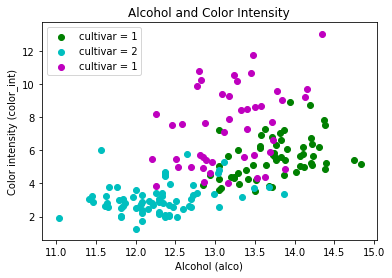

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['alco'][df['cultivar'] == 1], df['color_int'][df['cultivar'] == 1], color='g', label='cultivar = 1')
plt.scatter(df['alco'][df['cultivar'] == 2], df['color_int'][df['cultivar'] == 2], color='c', label='cultivar = 2')
plt.scatter(df['alco'][df['cultivar'] == 3], df['color_int'][df['cultivar'] == 3], color='m', label='cultivar = 1')
plt.title("Alcohol and Color Intensity")
plt.xlabel('Alcohol (alco)')
plt.ylabel('Color intensity (color_int)')
plt.legend()
plt.show()

#### (b)

In [6]:
from scipy.stats import uniform as sp_uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

X = df[['alco','malic','tot_phen','color_int']]
y = df['cultivar']
param_dist1 = {'penalty': ['l1', 'l2'], 
               'C': sp_uniform(0.1, 10.0)}
rc1 = RandomizedSearchCV(LogisticRegression(), param_dist1, \
    n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rc_model1 = rc1.fit(X, y)
print('The optimal tuning parameter values are', rc_model1.best_params_)
print('The MSE of the optimal results is', -rc_model1.best_score_)

The optimal tuning parameter values are {'C': 8.128371786090085, 'penalty': 'l2'}
The MSE of the optimal results is 0.09015873015873017


#### (c)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
rf2 = RandomForestClassifier()
rc2 = RandomizedSearchCV(rf2, param_dist2, 
         n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rc_model2 = rc2.fit(X, y)
print('The optimal tuning parameter values are', rc_model2.best_params_)
print('The MSE of the optimal results is', -rc_model2.best_score_)

The optimal tuning parameter values are {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 14, 'min_samples_split': 9, 'n_estimators': 93}
The MSE of the optimal results is 0.13079365079365077


#### (d)

In [8]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform

param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0), 
               'gamma': ['scale', 'auto'], 
               'shrinking': [True, False]}
rc3 = RandomizedSearchCV(SVC(kernel='rbf'), param_distributions=param_dist3,
    n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rc_model3 = rc3.fit(X, y)
print('The optimal tuning parameter values are', rc_model3.best_params_)
print('The MSE of the optimal results is', -rc_model3.best_score_)

The optimal tuning parameter values are {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}
The MSE of the optimal results is 0.1461904761904762


#### (e)

In [9]:
from sklearn.neural_network import MLPClassifier

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
rc4 = RandomizedSearchCV(MLPClassifier(solver='lbfgs'), param_dist4, 
    n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rc4_model = rc4.fit(X, y)
print('The optimal tuning parameter values are', rc4_model.best_params_)
print('The MSE of the optimal results is', -rc4_model.best_score_)

The optimal tuning parameter values are {'activation': 'relu', 'alpha': 0.7965389843643799, 'hidden_layer_sizes': 91}
The MSE of the optimal results is 0.07857142857142858


#### (f)

I think the neural network model is the best predictor of $cultivar$ since it produces the smallest MSE.